Link : [Kaggle Page](https://www.kaggle.com/datasets/mariyamalshatta/nike-vs-addidas-unspervised-clustering/data)

## Data Description 
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

## Primary Objective
Machine learning clustering techniques approach for extracting actionable insights from the Nike and Adidas footwear dataset, enabling data-driven decision making and strategic business recommendations.

## Detailed Objectives

1. **Data Analysis & Pattern Discovery**
   
2. **Advanced Machine Learning Clustering Implementation**
 
3. **Business Intelligence Generation**


## Expected Outcomes
The project aims to deliver a comprehensive understanding of product dynamics between Nike and Adidas Sneakers, enabling informed decision-making for product development and marketing strategies.

1. **Analyze variable to find insightful information**
2. **Product grouping that can implement as a recommendation or segmentation**

# Import Library and Load Dataset from Kaggle

In [351]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3263                                 Air Jordan 8 Retro  CI1236-100   
3264                         Nike Phantom Venom Club IC  AO0578-717   
3265               Nike Mercurial Superfly 7 Academy TF  AT7978-414   
3266                                    Nike Air Max 98  AH6799-300   
3267                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount                    Brand  Rating  \
0             14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1              7599        3799        50         Adidas ORIGINALS     3.3   
2               999         599        40        Adidas CORE / NEO     2.6   
3              6999        3499        50        Adidas CORE / NEO     4.1   
4              7999        3999        50         Adidas ORIGINALS     3.5   
...             ...         ...       ...                      ...     ...   
3263          15995       12797         0                     Nike     5.0   
3264           4995        3497         0                     Nike     0.0   
3265           8495        5947         0                     Nike     5.0   
3266              0       16995         0                     Nike     4.0   
3267           8995        6297         0                     Nike     0.0   

      Reviews  
0          41  
1          24  
2          37  
3          35  
4          72  
...       ...  
3263        1  
3264        0  
3265        1  
3266        4  
3267        0  

[3268 rows x 8 columns]

## Data Pre-processing

### Data Info

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


### Descriptive Statistics

In [354]:
df.describe().round(2).T

count     mean      std    min     25%     50%     75%  \
Listing Price  3268.0  6868.02  4724.66    0.0  4299.0  5999.0  8999.0   
Sale Price     3268.0  6134.27  4293.25  449.0  2999.0  4799.0  7995.0   
Discount       3268.0    26.88    22.63    0.0     0.0    40.0    50.0   
Rating         3268.0     3.24     1.43    0.0     2.6     3.5     4.4   
Reviews        3268.0    40.55    31.54    0.0    10.0    37.0    68.0   

                   max  
Listing Price  29999.0  
Sale Price     36500.0  
Discount          60.0  
Rating             5.0  
Reviews          223.0

In [355]:
missing_value = df.isnull().values.any()
total_row = len(df)
total_duplicated_row = df.duplicated().sum()
duplicate_percentage = (total_duplicated_row / total_row * 100).round(2)


print(f"Missing value: {missing_value:,}")
print(f"Total Row: {total_row:,}")
print(f"Duplicated Row: {duplicate_row:,}")
print(f"Percentage of Duplicates: {duplicate_percentage}%")

Missing value: 0
Total Row: 3,268
Duplicated Row: 88
Percentage of Duplicates: 2.69%


### Remove Duplicate

In [356]:
df = df.drop_duplicates().reset_index(drop=True)
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3175                    Nike Tiempo Legend 8 Academy TF  AT6100-606   
3176                              Nike React Metcon AMP  CT9155-063   
3177                                 Air Jordan 8 Retro  CI1236-100   
3178                                    Nike Air Max 98  AH6799-300   
3179                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount                    Brand  Rating  \
0             14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1              7599        3799        50         Adidas ORIGINALS     3.3   
2               999         599        40        Adidas CORE / NEO     2.6   
3              6999        3499        50        Adidas CORE / NEO     4.1   
4              7999        3999        50         Adidas ORIGINALS     3.5   
...             ...         ...       ...                      ...     ...   
3175              0        6495         0                     Nike     0.0   
3176              0       13995         0                     Nike     3.0   
3177          15995       12797         0                     Nike     5.0   
3178              0       16995         0                     Nike     4.0   
3179           8995        6297         0                     Nike     0.0   

      Reviews  
0          41  
1          24  
2          37  
3          35  
4          72  
...       ...  
3175        0  
3176        1  
3177        1  
3178        4  
3179        0  

[3180 rows x 8 columns]

## Explanatory Data Analysis

## Boxplot Categorize Based on Brand

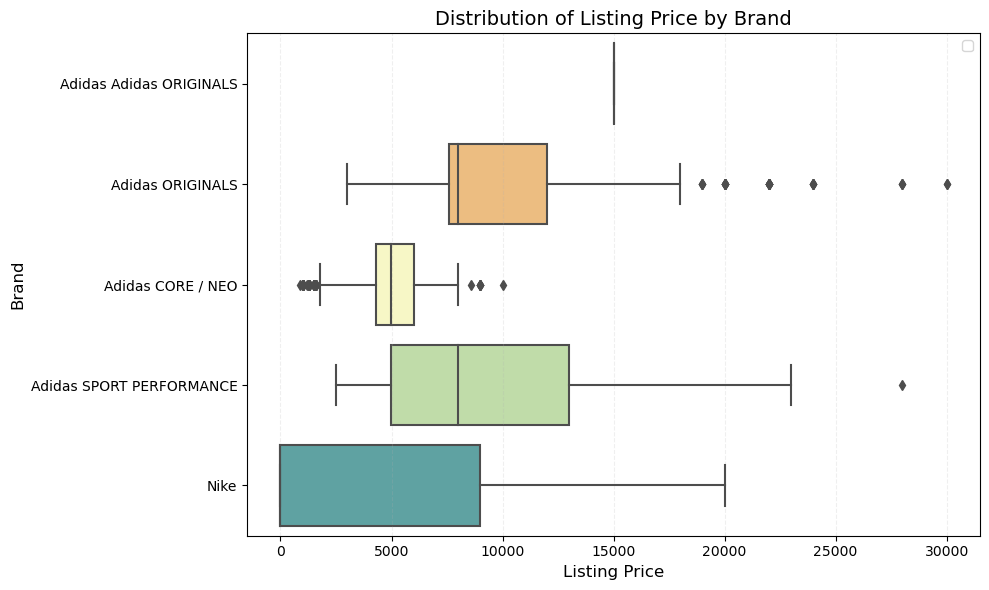

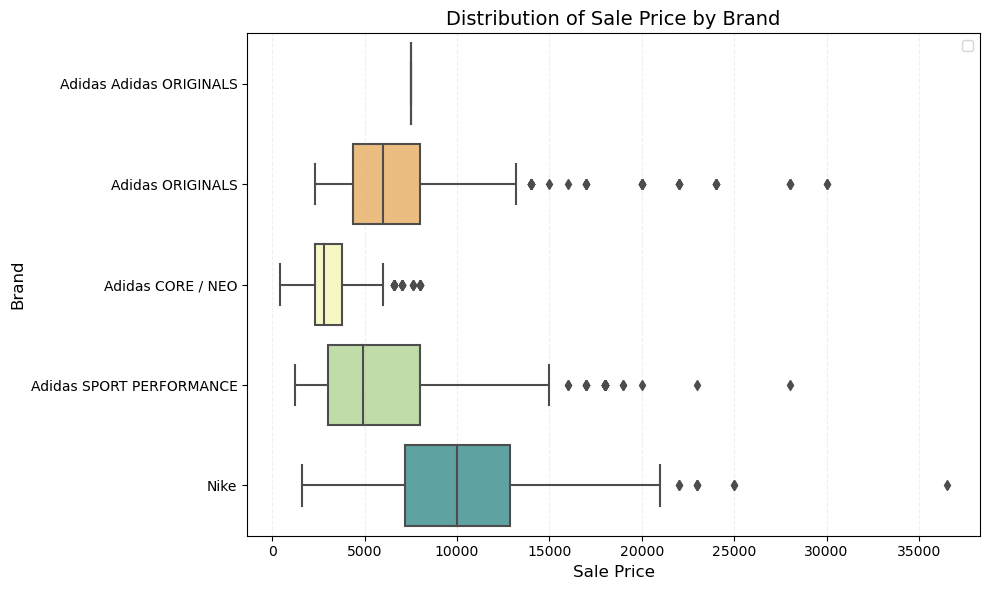

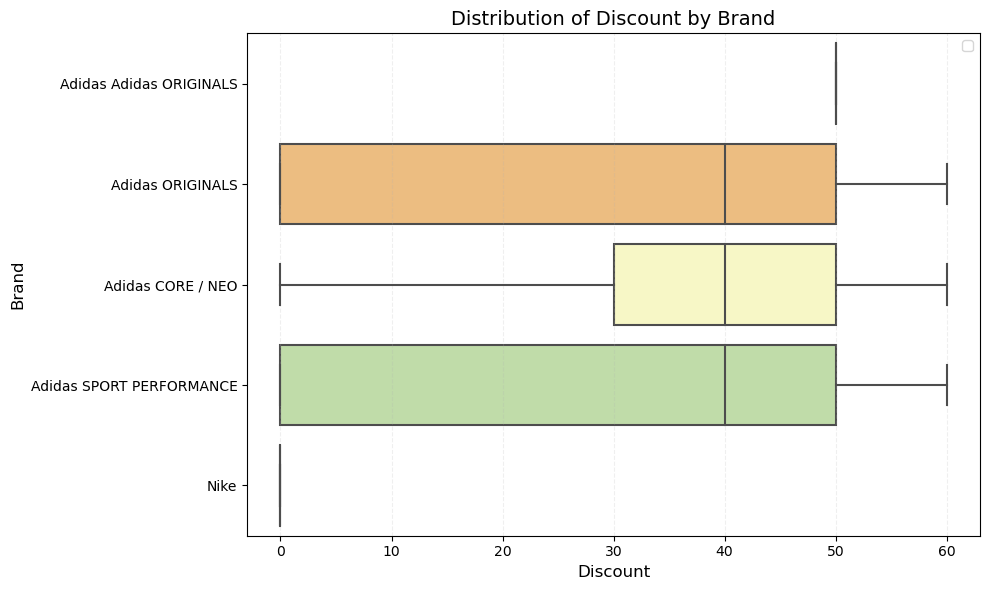

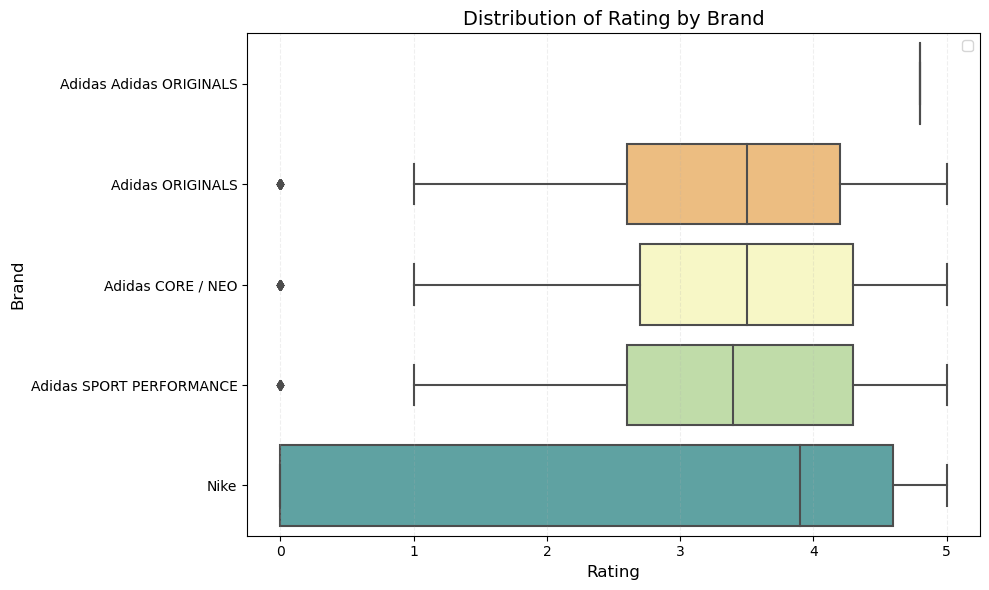

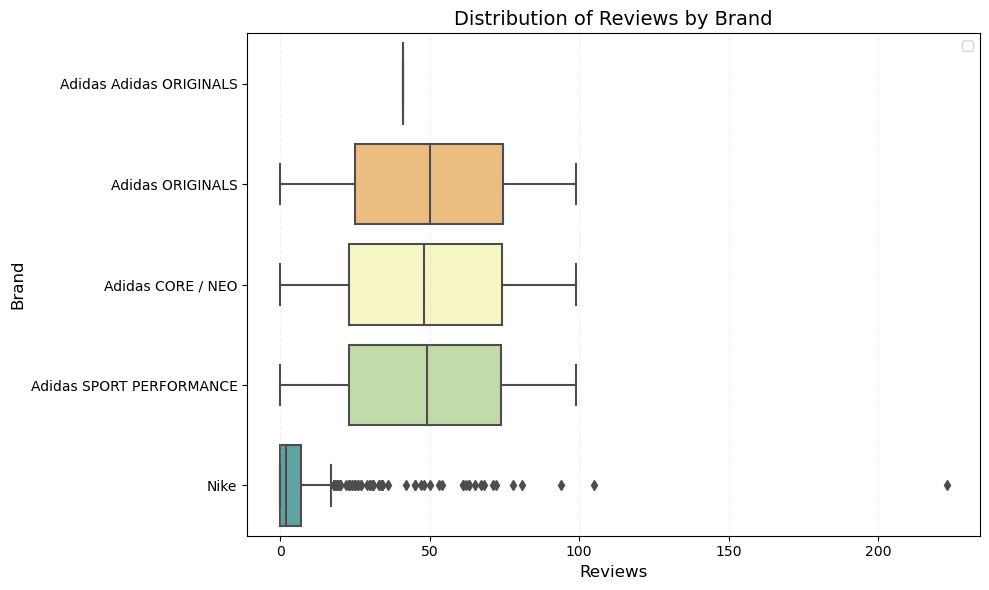

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=numeric_column, y="Brand", palette="Spectral")
    plt.title(f'Distribution of {numeric_column} by Brand', fontsize=14)
    plt.xlabel(numeric_column, fontsize=12)
    plt.ylabel("Brand", fontsize=12)   
    plt.legend([],[], frameon=True)  
    plt.grid(axis='x', linestyle="--", alpha=0.2)
    plt.tight_layout()
    plt.show()

In [358]:
# Fix typo
df.at[0, 'Brand'] = 'Adidas ORIGINALS'

### Feature Engineering

In [359]:
df['Discount Amount'] = df.apply(
    lambda row: 0 if row['Listing Price'] == 0 else row['Listing Price'] - row['Sale Price'], 
    axis=1
)
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3175                    Nike Tiempo Legend 8 Academy TF  AT6100-606   
3176                              Nike React Metcon AMP  CT9155-063   
3177                                 Air Jordan 8 Retro  CI1236-100   
3178                                    Nike Air Max 98  AH6799-300   
3179                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount              Brand  Rating  Reviews  \
0             14999        7499        50   Adidas ORIGINALS     4.8       41   
1              7599        3799        50   Adidas ORIGINALS     3.3       24   
2               999         599        40  Adidas CORE / NEO     2.6       37   
3              6999        3499        50  Adidas CORE / NEO     4.1       35   
4              7999        3999        50   Adidas ORIGINALS     3.5       72   
...             ...         ...       ...                ...     ...      ...   
3175              0        6495         0               Nike     0.0        0   
3176              0       13995         0               Nike     3.0        1   
3177          15995       12797         0               Nike     5.0        1   
3178              0       16995         0               Nike     4.0        4   
3179           8995        6297         0               Nike     0.0        0   

      Discount Amount  
0                7500  
1                3800  
2                 400  
3                3500  
4                4000  
...               ...  
3175                0  
3176                0  
3177             3198  
3178                0  
3179             2698  

[3180 rows x 9 columns]

In [360]:
df['Discount'] = np.where(
    df['Discount Amount'] == 0, 
    0, 
    np.round((df['Discount Amount'] / df['Listing Price']) * 100, 0)
)
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3175                    Nike Tiempo Legend 8 Academy TF  AT6100-606   
3176                              Nike React Metcon AMP  CT9155-063   
3177                                 Air Jordan 8 Retro  CI1236-100   
3178                                    Nike Air Max 98  AH6799-300   
3179                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount              Brand  Rating  Reviews  \
0             14999        7499      50.0   Adidas ORIGINALS     4.8       41   
1              7599        3799      50.0   Adidas ORIGINALS     3.3       24   
2               999         599      40.0  Adidas CORE / NEO     2.6       37   
3              6999        3499      50.0  Adidas CORE / NEO     4.1       35   
4              7999        3999      50.0   Adidas ORIGINALS     3.5       72   
...             ...         ...       ...                ...     ...      ...   
3175              0        6495       0.0               Nike     0.0        0   
3176              0       13995       0.0               Nike     3.0        1   
3177          15995       12797      20.0               Nike     5.0        1   
3178              0       16995       0.0               Nike     4.0        4   
3179           8995        6297      30.0               Nike     0.0        0   

      Discount Amount  
0                7500  
1                3800  
2                 400  
3                3500  
4                4000  
...               ...  
3175                0  
3176                0  
3177             3198  
3178                0  
3179             2698  

[3180 rows x 9 columns]

In [361]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    zero_counts = df[df[column] == 0].groupby('Brand')[column].count()
    print(f"Zero count in '{column}' by Brand:")
    print(zero_counts)
    print("\n")


Zero count in 'Listing Price' by Brand:
Brand
Nike    362
Name: Listing Price, dtype: int64


Zero count in 'Sale Price' by Brand:
Series([], Name: Sale Price, dtype: int64)


Zero count in 'Discount' by Brand:
Brand
Adidas CORE / NEO           212
Adidas ORIGINALS            282
Adidas SPORT PERFORMANCE    165
Nike                        362
Name: Discount, dtype: int64


Zero count in 'Rating' by Brand:
Brand
Adidas CORE / NEO            27
Adidas ORIGINALS             32
Adidas SPORT PERFORMANCE     14
Nike                        190
Name: Rating, dtype: int64


Zero count in 'Reviews' by Brand:
Brand
Adidas CORE / NEO            10
Adidas ORIGINALS              9
Adidas SPORT PERFORMANCE      9
Nike                        190
Name: Reviews, dtype: int64


Zero count in 'Discount Amount' by Brand:
Brand
Adidas CORE / NEO           212
Adidas ORIGINALS            282
Adidas SPORT PERFORMANCE    165
Nike                        362
Name: Discount Amount, dtype: int64




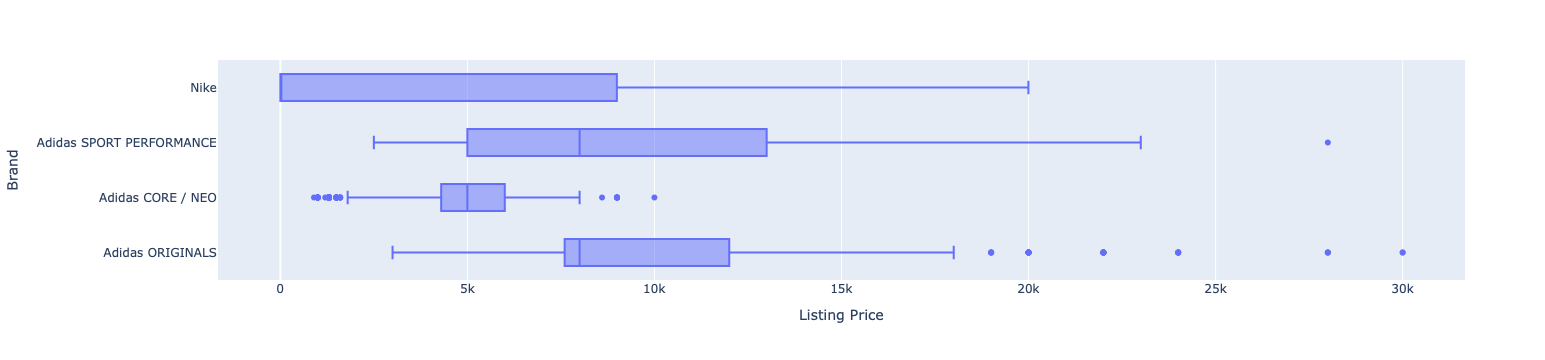

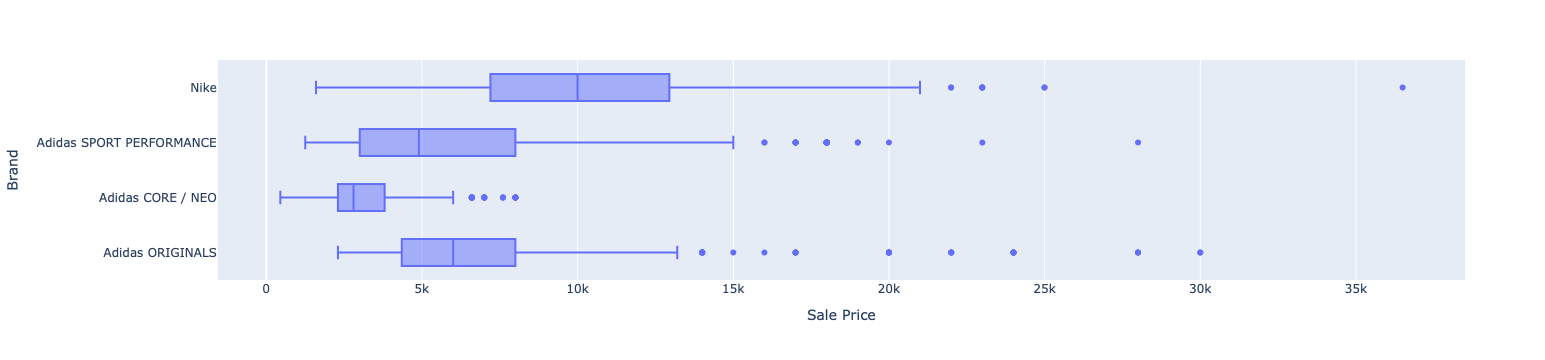

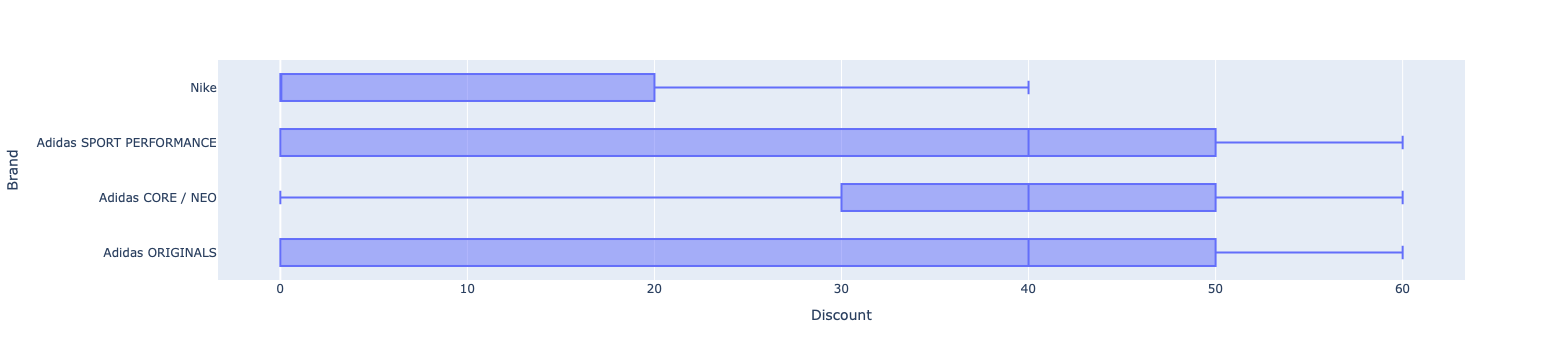

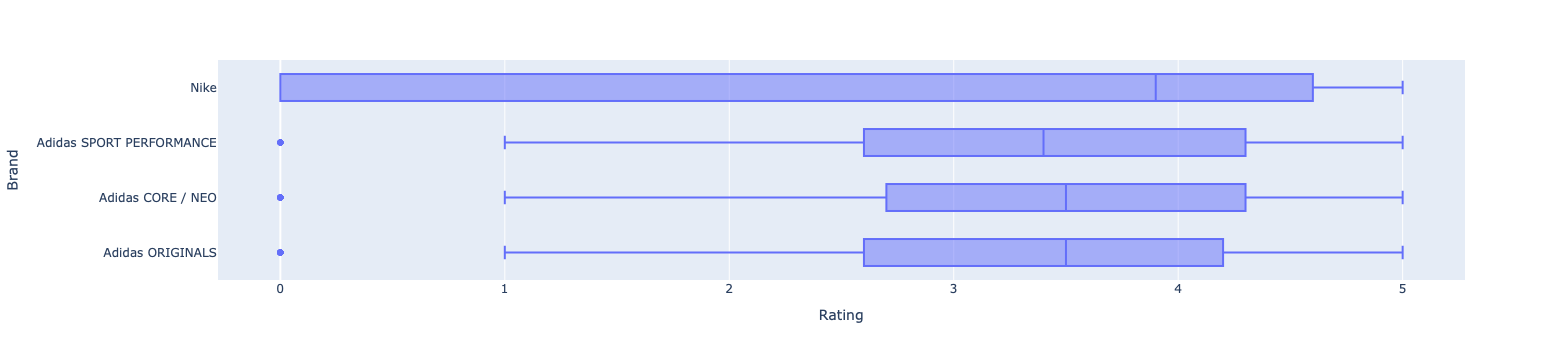

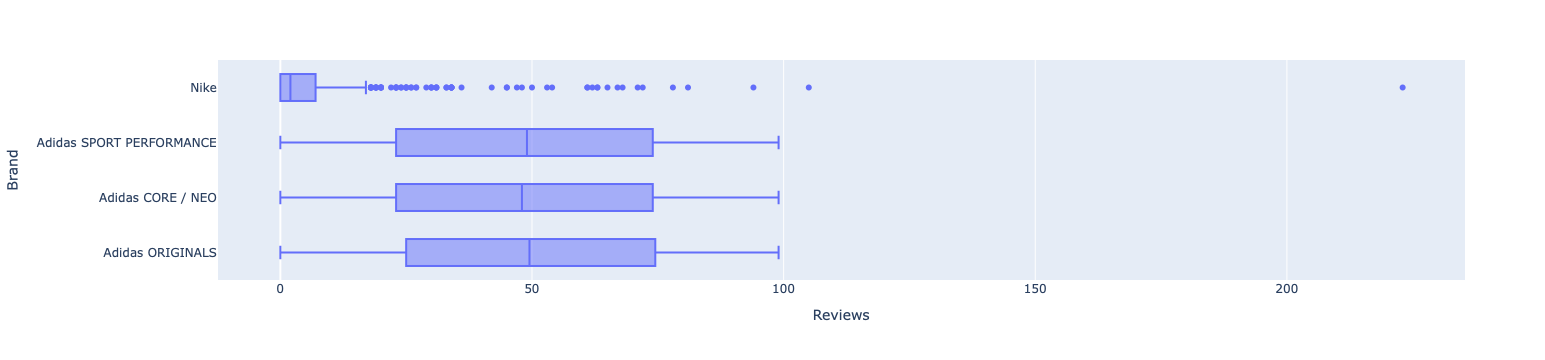

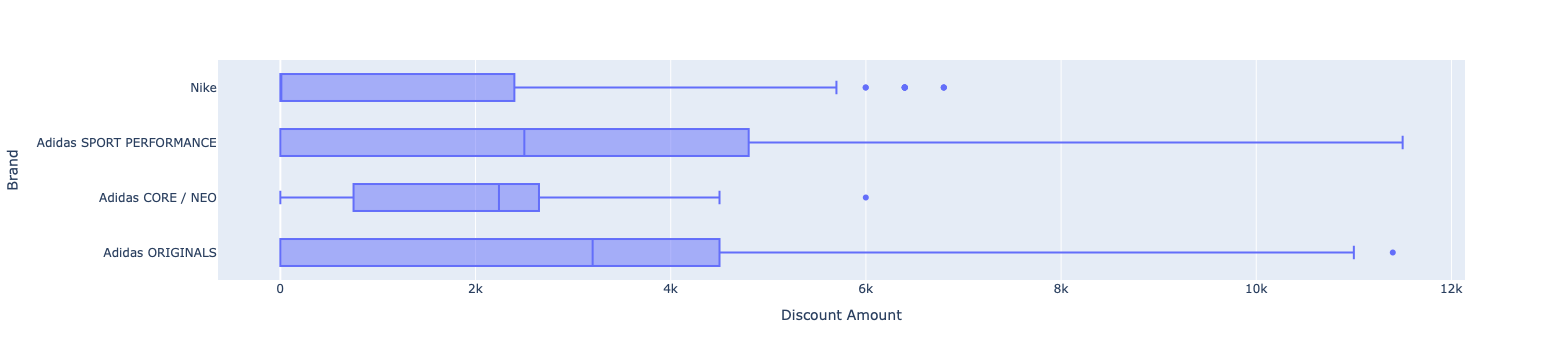

In [362]:
import plotly.express as px

for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    fig = px.box(df, x=numeric_column, y="Brand", hover_data=["Product Name"])
    fig.update_traces(quartilemethod="linear")
    fig.show()

In [364]:
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3175                    Nike Tiempo Legend 8 Academy TF  AT6100-606   
3176                              Nike React Metcon AMP  CT9155-063   
3177                                 Air Jordan 8 Retro  CI1236-100   
3178                                    Nike Air Max 98  AH6799-300   
3179                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount              Brand  Rating  Reviews  \
0             14999        7499      50.0   Adidas ORIGINALS     4.8       41   
1              7599        3799      50.0   Adidas ORIGINALS     3.3       24   
2               999         599      40.0  Adidas CORE / NEO     2.6       37   
3              6999        3499      50.0  Adidas CORE / NEO     4.1       35   
4              7999        3999      50.0   Adidas ORIGINALS     3.5       72   
...             ...         ...       ...                ...     ...      ...   
3175              0        6495       0.0               Nike     0.0        0   
3176              0       13995       0.0               Nike     3.0        1   
3177          15995       12797      20.0               Nike     5.0        1   
3178              0       16995       0.0               Nike     4.0        4   
3179           8995        6297      30.0               Nike     0.0        0   

      Discount Amount  
0                7500  
1                3800  
2                 400  
3                3500  
4                4000  
...               ...  
3175                0  
3176                0  
3177             3198  
3178                0  
3179             2698  

[3180 rows x 9 columns]

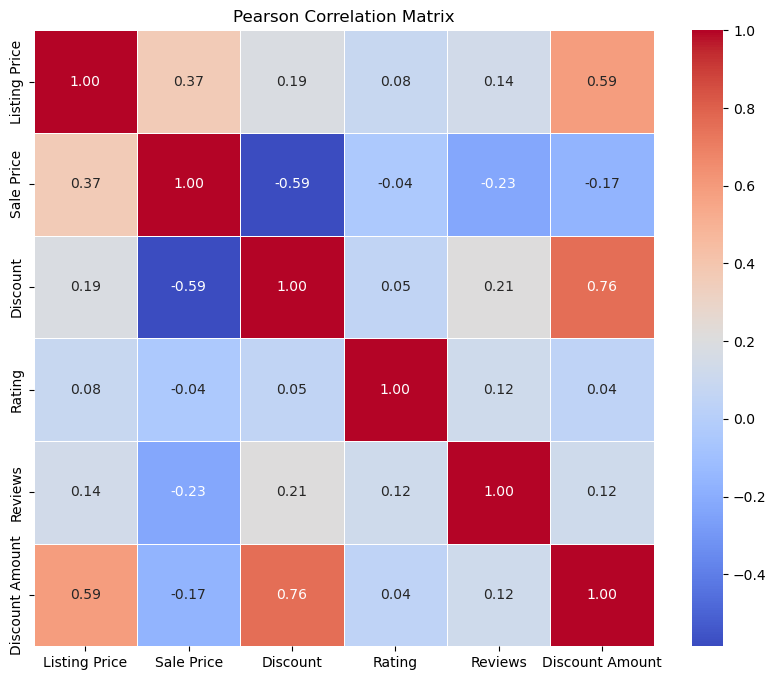

In [367]:
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

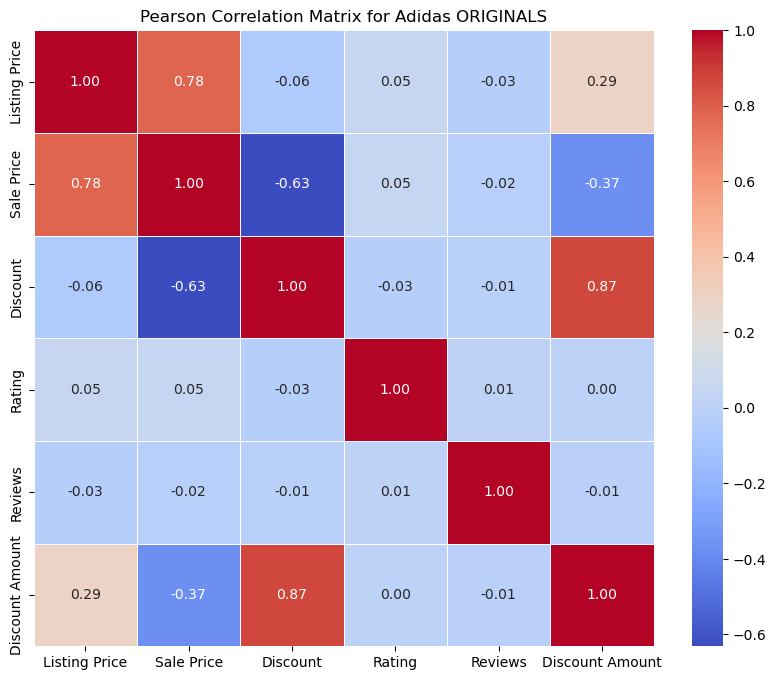

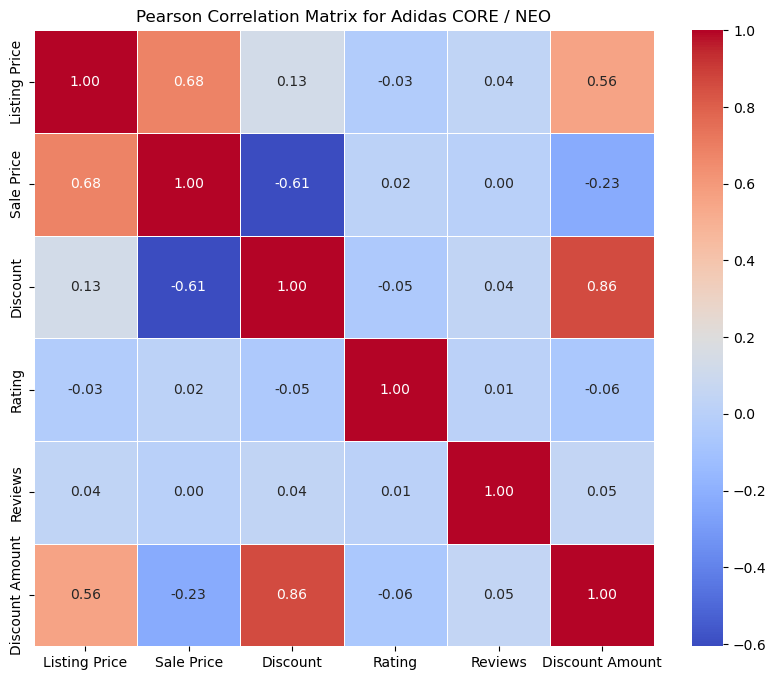

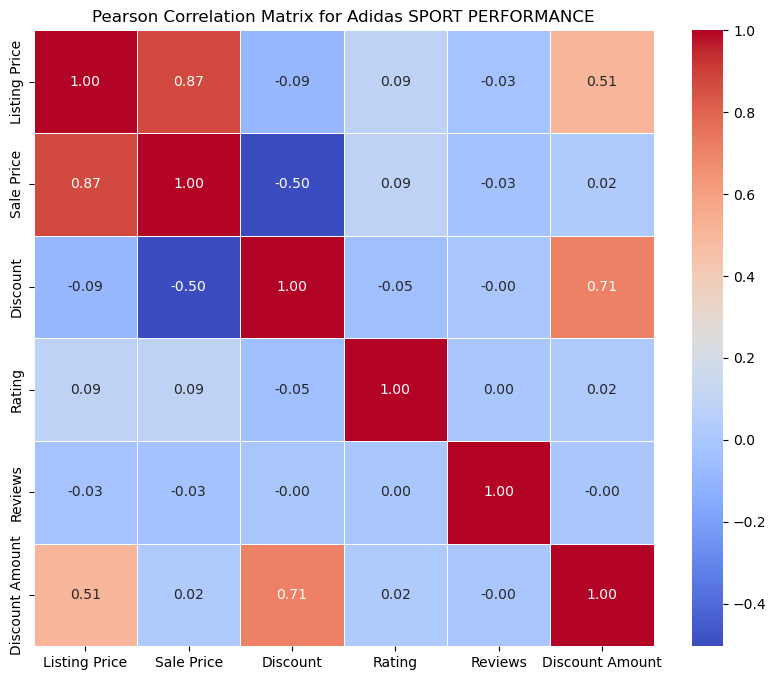

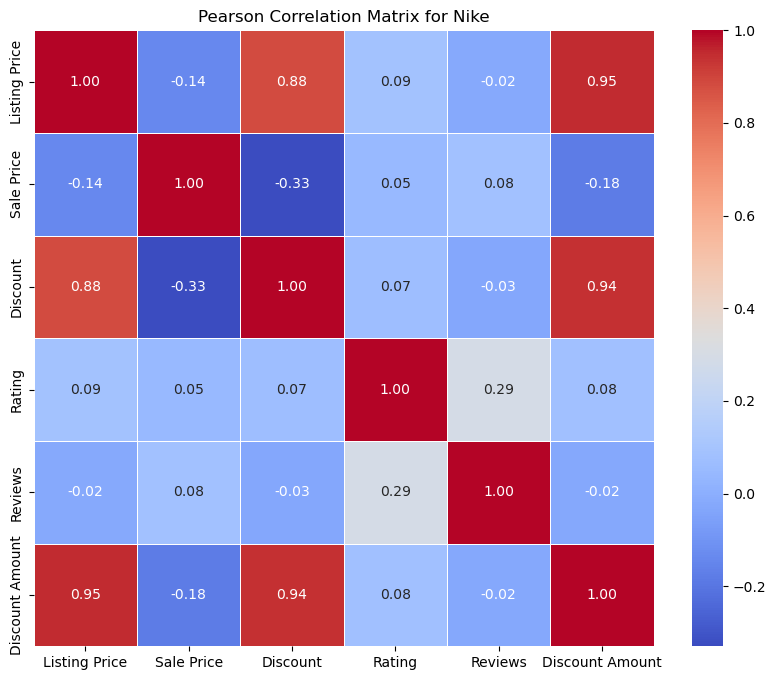

In [246]:
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
#     return df

# for col in ['Sale Price', 'Rating','Reviews','Discount','Discount Amount']:
#     df = remove_outliers_iqr(df, col)

# df.reset_index(drop=True, inplace=True)

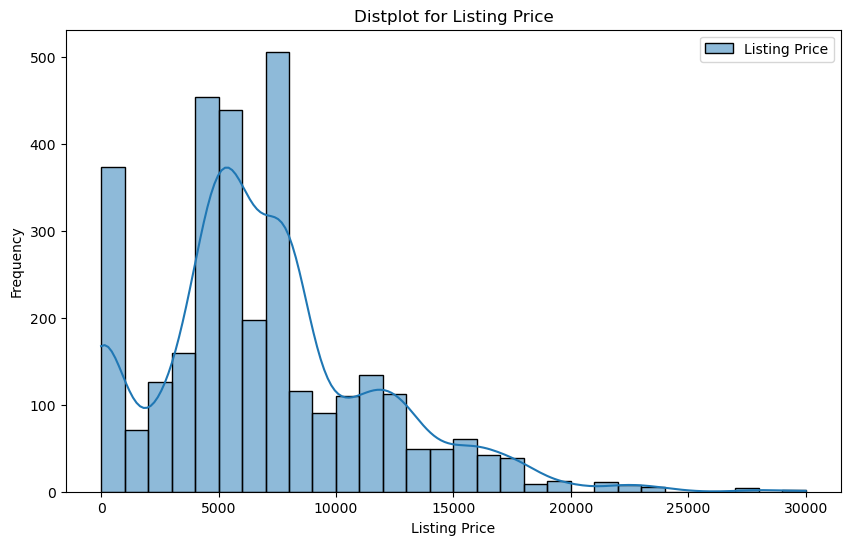

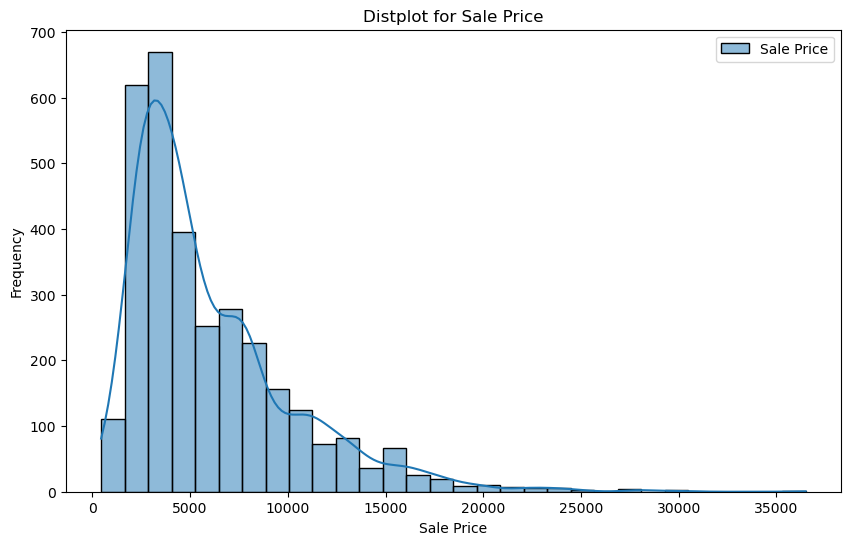

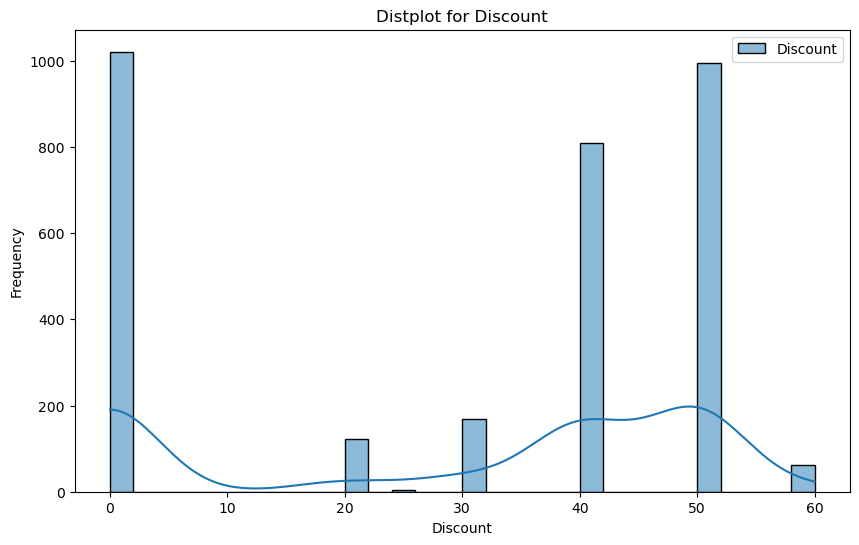

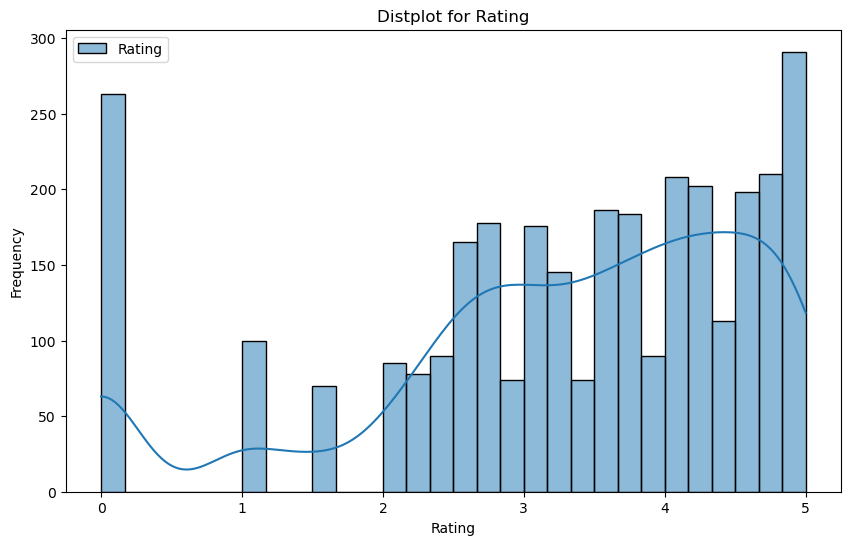

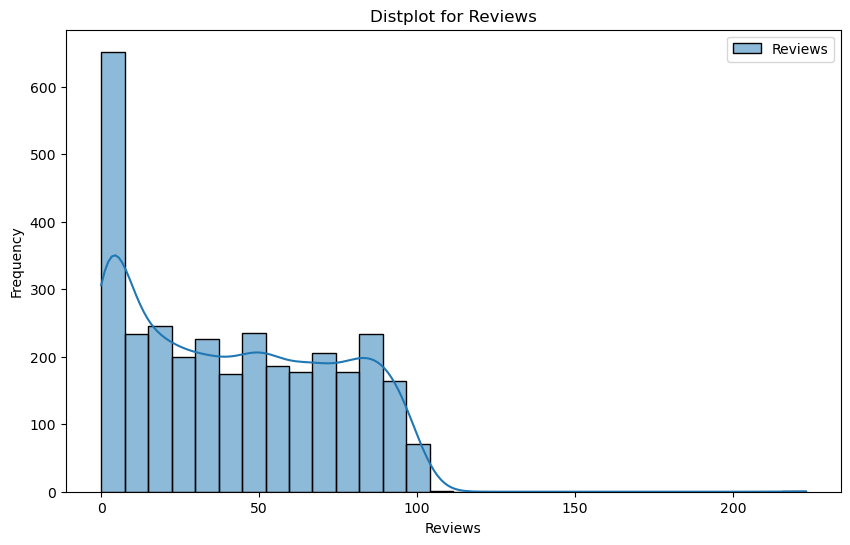

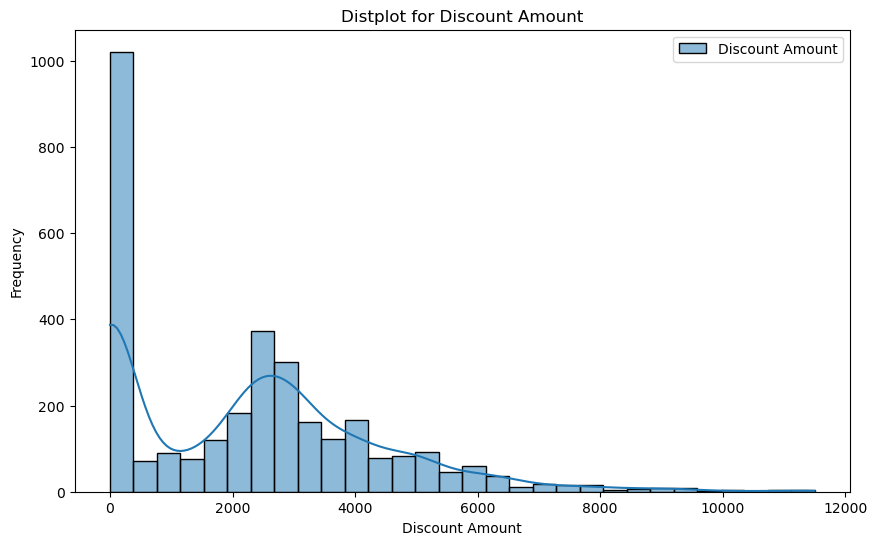

In [363]:
import matplotlib.pyplot as plt


for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[numeric_column], kde=True, bins=30, label=numeric_column)
    plt.title(f"Distplot for {numeric_column}")
    plt.xlabel(numeric_column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [248]:
from scipy.stats import skew

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for each numeric column
skewness_results = {}
for col in numeric_columns:
    skewness = skew(df[col], bias=True, nan_policy='omit')  # Ignore NaNs in calculations
    skewness_results[col] = skewness

# Display results
for col, skew_val in skewness_results.items():
    print(f"Skewness of {col}: {skew_val:.3f}")


Skewness of Listing Price: 0.809
Skewness of Sale Price: 1.684
Skewness of Discount: -0.239
Skewness of Rating: -0.930
Skewness of Reviews: 0.307


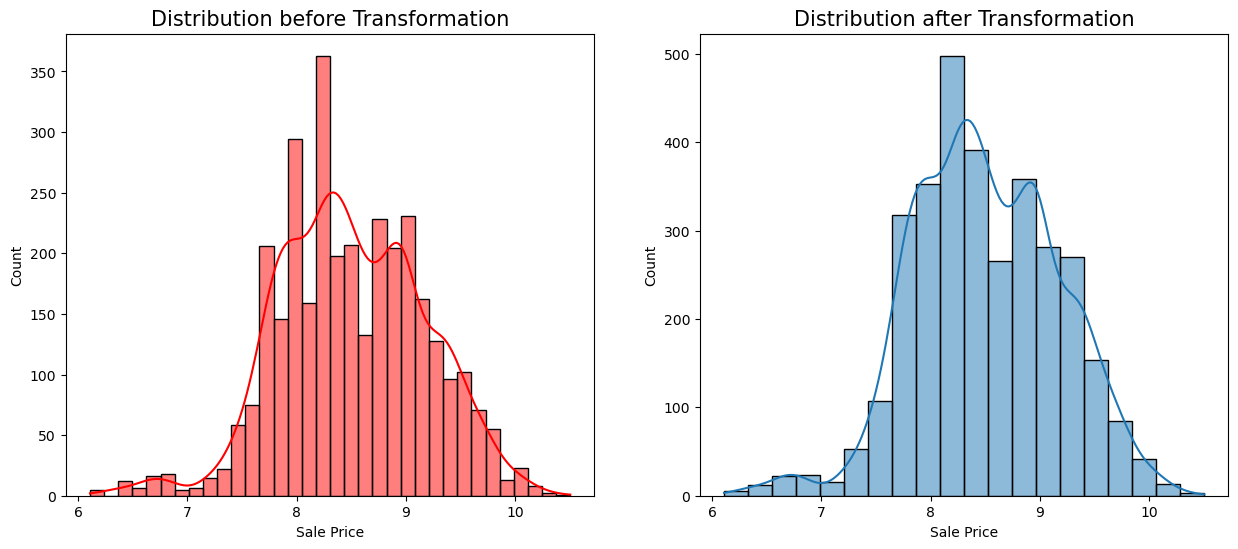

Skewness was 0.92 before & is -0.1 after log transformation.


In [249]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def logTrans(feature):   
    # Apply log transformation
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
    
    # Transform the data
    df_transformed = pd.DataFrame(logTr.fit_transform(df), columns=[feature], index=df.index)
    
    # Save the transformed data back to the original DataFrame
    df[feature] = df_transformed[feature]
    
    # Visualize the distribution
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    
    plt.subplot(1, 2, 2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df[feature], bins=20, kde=True, legend=False)
    plt.xlabel(feature)
    plt.show()
    
    # Print skewness before and after
    old_skew_value = old_skew[feature]  # Original skewness
    new_skew_value = df[feature].skew()  # New skewness
    print(f"Skewness was {round(old_skew_value, 2)} before & is {round(new_skew_value, 2)} after log transformation.")
    
# Example usage
logTrans(feature="Sale Price")


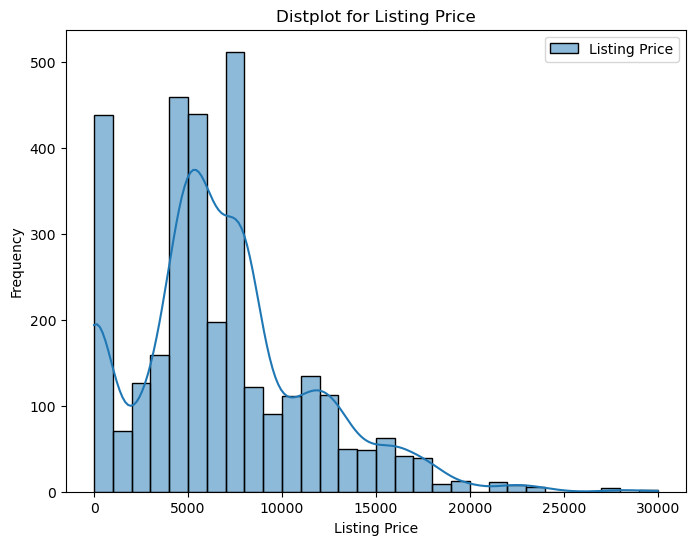

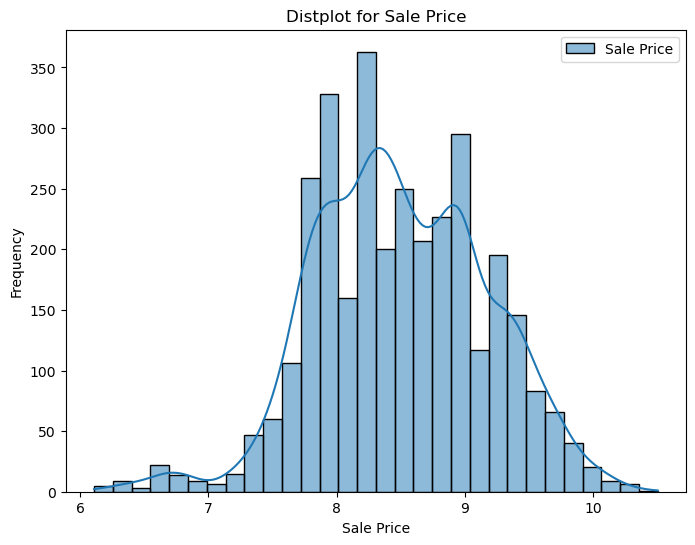

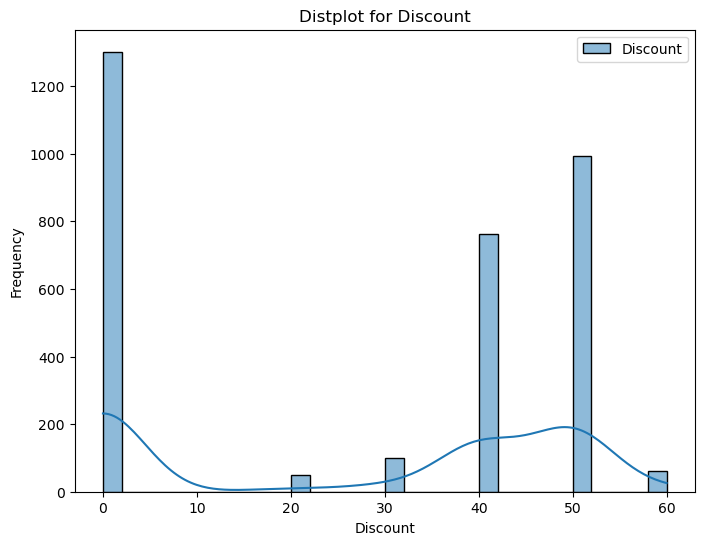

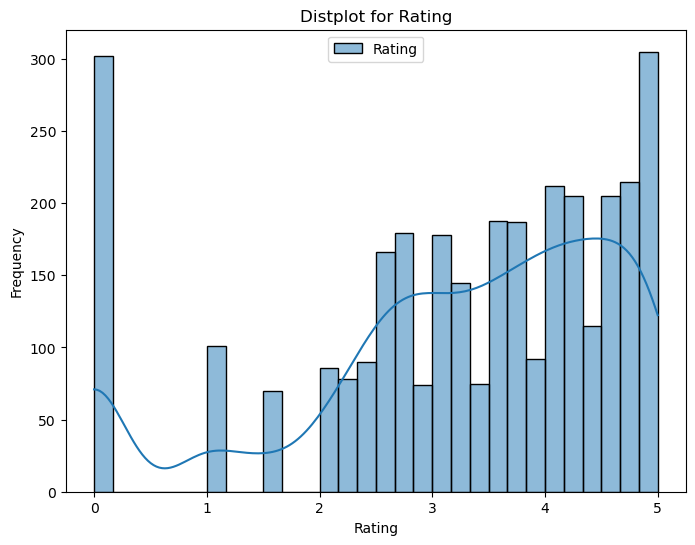

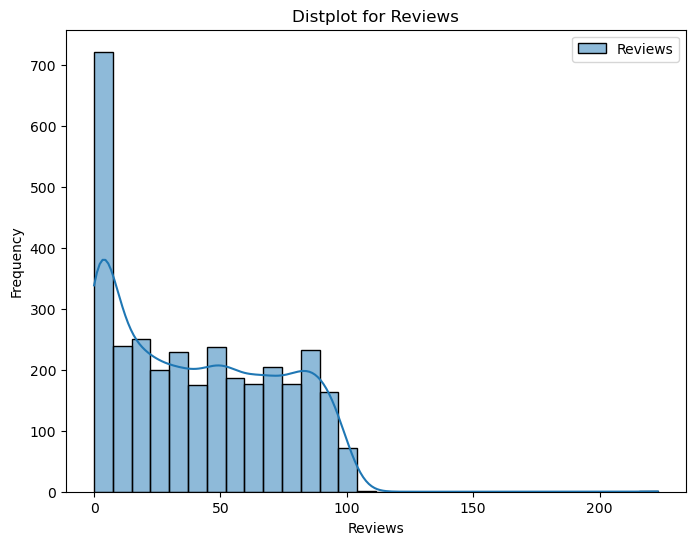

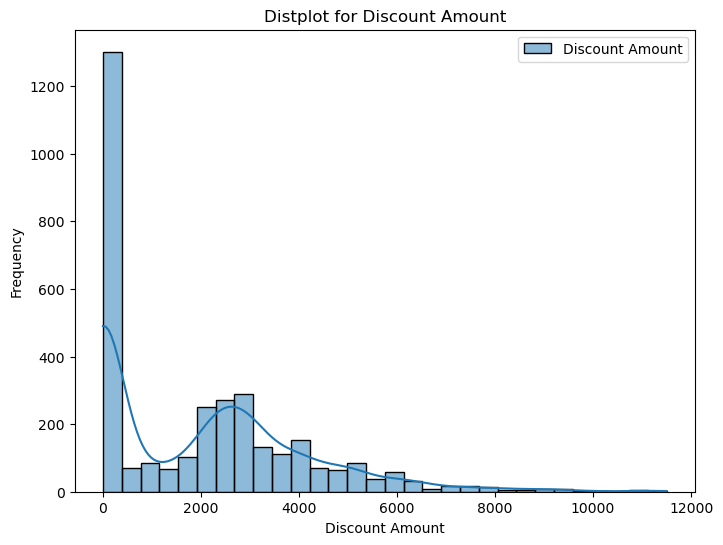

In [251]:
import matplotlib.pyplot as plt

for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[numeric_column], kde=True, bins=30, label=numeric_column)
    plt.title(f"Distplot for {numeric_column}")
    plt.xlabel(numeric_column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [252]:
from sklearn.preprocessing import MinMaxScaler

# Drop irrelevant columns
columns_to_drop = ['Product Name', 'Product ID', 'Brand', 'Discount Amount']
df_numeric = df.drop(columns=columns_to_drop)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_numeric)

# Convert back to a DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=df_numeric.columns, index=df.index)

# Check the normalized DataFrame
df_normalized.head()


Listing Price  Sale Price  Discount  Rating   Reviews
0       0.499983    0.640016  0.833333    0.96  0.183857
1       0.253308    0.485346  0.833333    0.66  0.107623
2       0.033301    0.065444  0.666667    0.52  0.165919
3       0.233308    0.466638  0.833333    0.82  0.156951
4       0.266642    0.497015  0.833333    0.70  0.322870

## Outlier handling

Best K: 3


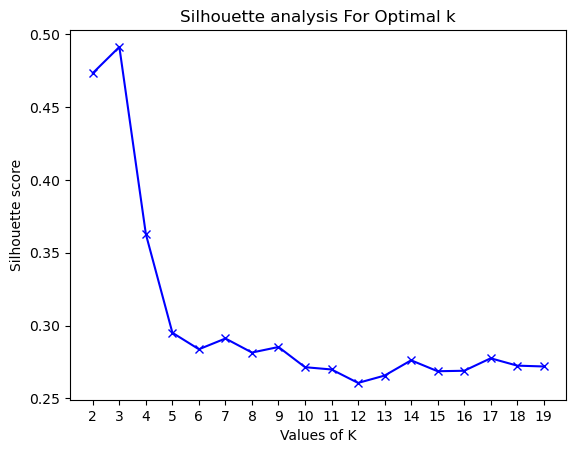

In [253]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
import numpy as np

X = df_normalized

silhouette_avg = []
for num_clusters in list(range(2,20)):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
    kmeans.fit_predict(df_normalized)
    score = silhouette_score(df_normalized, kmeans.labels_)
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

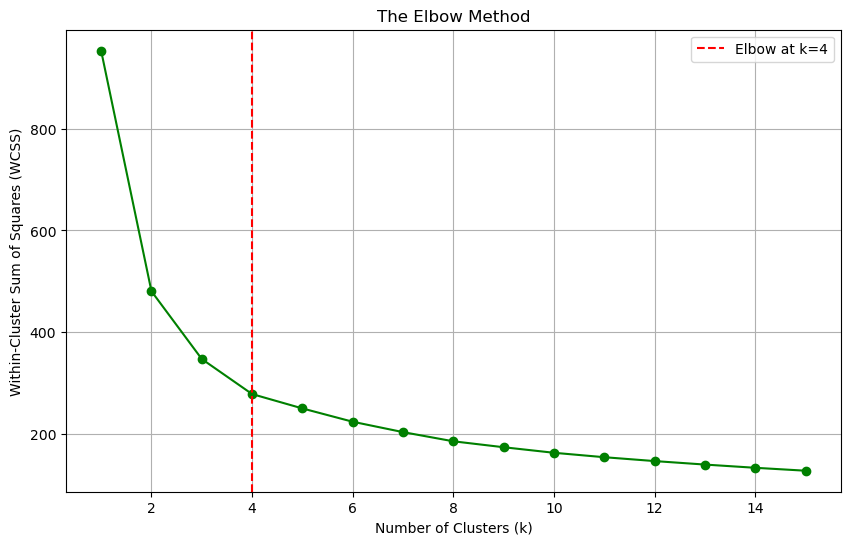

The optimal number of clusters is: 4


In [254]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

def find_optimal_k(data, max_k=15):
    """
    Find optimal k using elbow method with automated elbow detection.
    
    Parameters:
    data: DataFrame or array-like
        The input data to be clustered
    max_k: int
        Maximum number of clusters to try
        
    Returns:
    optimal_k: int
        Optimal number of clusters
    wcss: list
        List of within-cluster sum of squares for each k
    """
    
    # Calculate WCSS for different values of k
    wcss = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_normalized)
        wcss.append(kmeans.inertia_)
    
    # Use KneeLocator to find the elbow point
    kl = KneeLocator(
        x=list(k_values),
        y=wcss,
        curve='convex',
        direction='decreasing'
    )
    
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss, 'go-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('The Elbow Method')
    plt.axvline(x=kl.elbow, color='r', linestyle='--', label=f'Elbow at k={kl.elbow}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return kl.elbow, wcss

# Example usage
if __name__ == "__main__":
  
    
    optimal_k, wcss_values = find_optimal_k(df)
    print(f"The optimal number of clusters is: {optimal_k}")

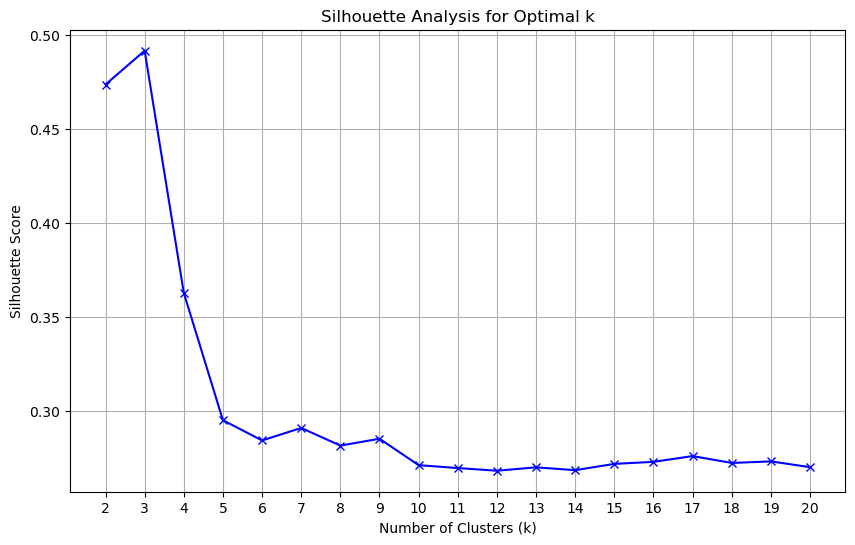

Best k based on silhouette analysis: 3


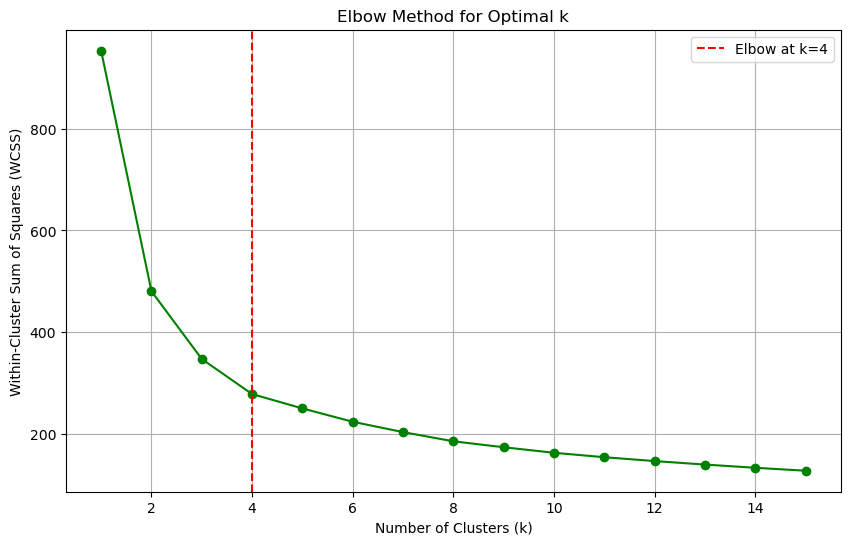

Optimal k based on the elbow method: 4
Silhouette Analysis Best k: 3
Elbow Method Optimal k: 4


In [255]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

def silhouette_analysis(data, max_k=20):
    """
    Perform silhouette analysis to determine the optimal number of clusters (k).
    
    Parameters:
    data: DataFrame or array-like
        The normalized dataset to be clustered.
    max_k: int
        Maximum number of clusters to test.
    
    Returns:
    best_k: int
        The optimal number of clusters based on silhouette score.
    silhouette_scores: list
        The silhouette scores for each k.
    """
    silhouette_avg = []
    
    for num_clusters in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=num_clusters, init="k-means++", n_init=10, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_avg.append(score)
    
    # Find the optimal k
    best_k = np.argmax(silhouette_avg) + 2  # Add 2 because range starts at 2
    
    # Plot the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_k + 1), silhouette_avg, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal k')
    plt.xticks(range(2, max_k + 1))
    plt.grid(True)
    plt.show()
    
    print(f"Best k based on silhouette analysis: {best_k}")
    return best_k, silhouette_avg


def elbow_method(data, max_k=15):
    """
    Perform the elbow method to determine the optimal number of clusters (k).
    
    Parameters:
    data: DataFrame or array-like
        The normalized dataset to be clustered.
    max_k: int
        Maximum number of clusters to test.
    
    Returns:
    optimal_k: int
        The optimal number of clusters based on the elbow method.
    wcss: list
        The within-cluster sum of squares (WCSS) for each k.
    """
    wcss = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Use KneeLocator to find the elbow point
    kl = KneeLocator(
        x=range(1, max_k + 1),
        y=wcss,
        curve='convex',
        direction='decreasing'
    )
    optimal_k = kl.elbow
    
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, 'go-')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for Optimal k')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Optimal k based on the elbow method: {optimal_k}")
    return optimal_k, wcss


# Example usage:
if __name__ == "__main__":
    # Call silhouette analysis
    best_k_silhouette, silhouette_scores = silhouette_analysis(df_normalized, max_k=20)
    
    # Call elbow method
    optimal_k_elbow, wcss_values = elbow_method(df_normalized, max_k=15)
    
    print(f"Silhouette Analysis Best k: {best_k_silhouette}")
    print(f"Elbow Method Optimal k: {optimal_k_elbow}")


In [256]:
from sklearn.cluster import KMeans
import pandas as pd

# Define the optimal number of clusters
optimal_k = 4

# Initialize and fit KMeans
kmeans = KMeans(
    n_clusters=optimal_k,
    init="k-means++",  # Efficient initialization
    n_init=20,         # Number of times the k-means algorithm will run with different initial centroid seeds
    max_iter=300,      # Maximum number of iterations for a single run
    random_state=42    # Ensures reproducibility
)

# Fit the model to the normalized data
kmeans.fit(df_normalized)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe (optional)
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# # Save to a CSV file (optional)
# df_with_clusters.to_csv('clustered_data.csv', index=False)

# Print cluster centers
print("Cluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_))


Cluster Centers:
           0         1         2         3         4
0  0.249461  0.471919  0.751467  0.826215  0.219723
1  0.130071  0.660399  0.002778  0.043133  0.037713
2  0.243820  0.468166  0.752621  0.441761  0.219861
3  0.223660  0.649937  0.010608  0.787194  0.152907


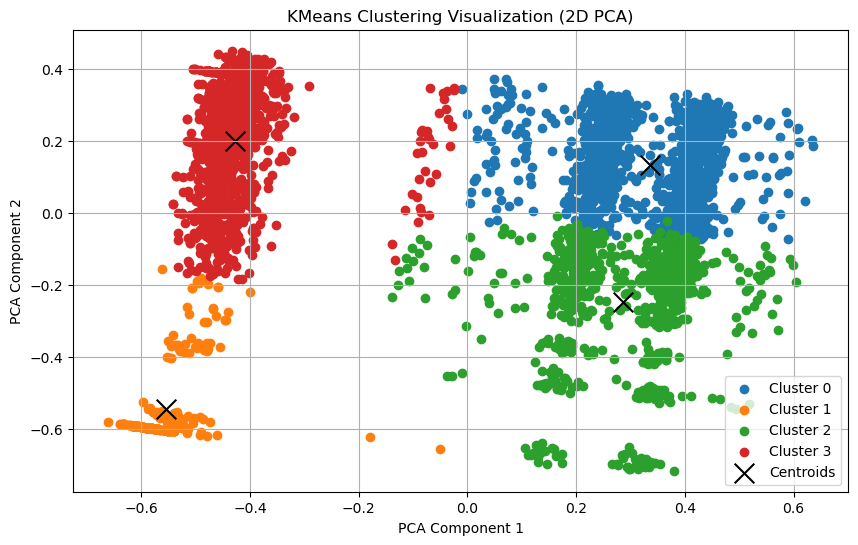

In [257]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df_normalized)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = data_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot cluster centers
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], color='black', marker='x', s=200, label='Centroids')

plt.title('KMeans Clustering Visualization (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


Silhouette Score for k=4: 0.36


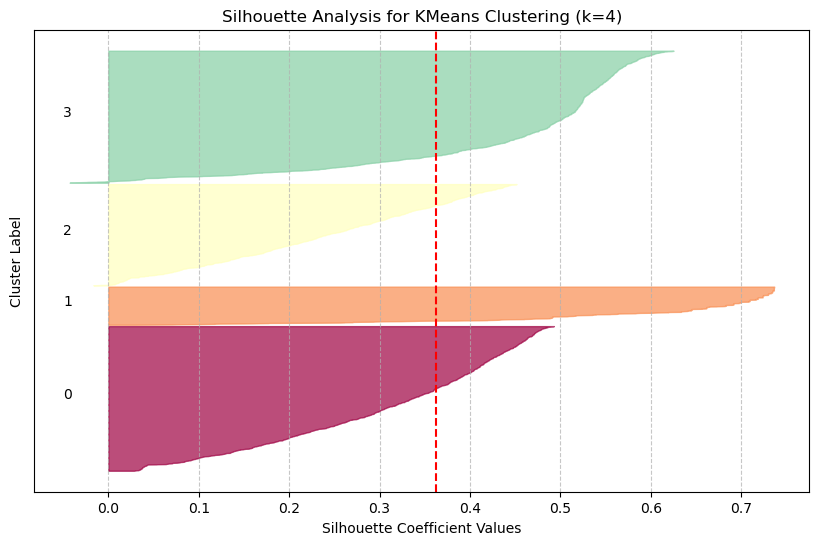

In [258]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Compute silhouette score
silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
print(f"Silhouette Score for k=4: {silhouette_avg:.2f}")

# Compute silhouette samples
silhouette_values = silhouette_samples(df_normalized, kmeans.labels_)

# Plot silhouette analysis
plt.figure(figsize=(10, 6))
y_lower = 10  # To leave space at the bottom of the plot

for i in range(optimal_k):
    # Get silhouette values for the current cluster
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    # Calculate the size of the cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot
    color = plt.cm.Spectral(i / optimal_k)  # Use colormap for cluster coloring
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Space between plots

# Add the average silhouette score line
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Analysis for KMeans Clustering (k=4)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.yticks([])  # Remove y-axis ticks for clarity
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()


In [259]:
def extract_gender(x):
    if x.lower().startswith("men's"):
        return "Men's"
    elif x.lower().startswith("women's"):
        return "Women's"
    else:
        return "Unisex"
df_with_clusters['Gender'] = df_with_clusters['Product Name'].apply(extract_gender)

df_with_clusters['Type'] = df_with_clusters['Product Name'].apply(lambda x: x.lower().split()[-1])

# Select columns

print(df_with_clusters.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df_with_clusters.sample(5).T  # Displays a random sample of 5 rows transposed for better visibility

(3268, 12)


153   \
Product Name     Women's adidas Originals Sleek Shoes   
Product ID                                     CG6193   
Listing Price                                    7599   
Sale Price                                   8.579229   
Discount                                           30   
Brand                                Adidas ORIGINALS   
Rating                                            1.0   
Reviews                                            15   
Discount Amount                                2279.7   
Cluster                                             2   
Gender                                        Women's   
Type                                            shoes   

                                                      355   \
Product Name     Women's adidas Originals Supercourt Shoes   
Product ID                                          EF9219   
Listing Price                                         7599   
Sale Price                                        8.425078   
Discount                                                40   
Brand                                     Adidas ORIGINALS   
Rating                                                 4.5   
Reviews                                                 89   
Discount Amount                                     3039.6   
Cluster                                                  0   
Gender                                             Women's   
Type                                                 shoes   

                                                453   \
Product Name     Men's adidas Running Asweerun Shoes   
Product ID                                    EE8448   
Listing Price                                   5599   
Sale Price                                  8.119696   
Discount                                          40   
Brand                              Adidas CORE / NEO   
Rating                                           2.8   
Reviews                                           95   
Discount Amount                               2239.6   
Cluster                                            2   
Gender                                         Men's   
Type                                           shoes   

                                                  114   \
Product Name     Men's adidas Running Nepton 2.0 Shoes   
Product ID                                      CL7471   
Listing Price                                     5599   
Sale Price                                    7.937375   
Discount                                            50   
Brand                                Adidas CORE / NEO   
Rating                                             3.8   
Reviews                                             36   
Discount Amount                                 2799.5   
Cluster                                              0   
Gender                                           Men's   
Type                                             shoes   

                                                             1743  
Product Name     Men's adidas Sport Inspired Advantage Base Shoes  
Product ID                                                 EE7696  
Listing Price                                                4999  
Sale Price                                               8.517193  
Discount                                                        0  
Brand                                           Adidas CORE / NEO  
Rating                                                        3.4  
Reviews                                                        16  
Discount Amount                                               0.0  
Cluster                                                         3  
Gender                                                      Men's  
Type                                                        shoes

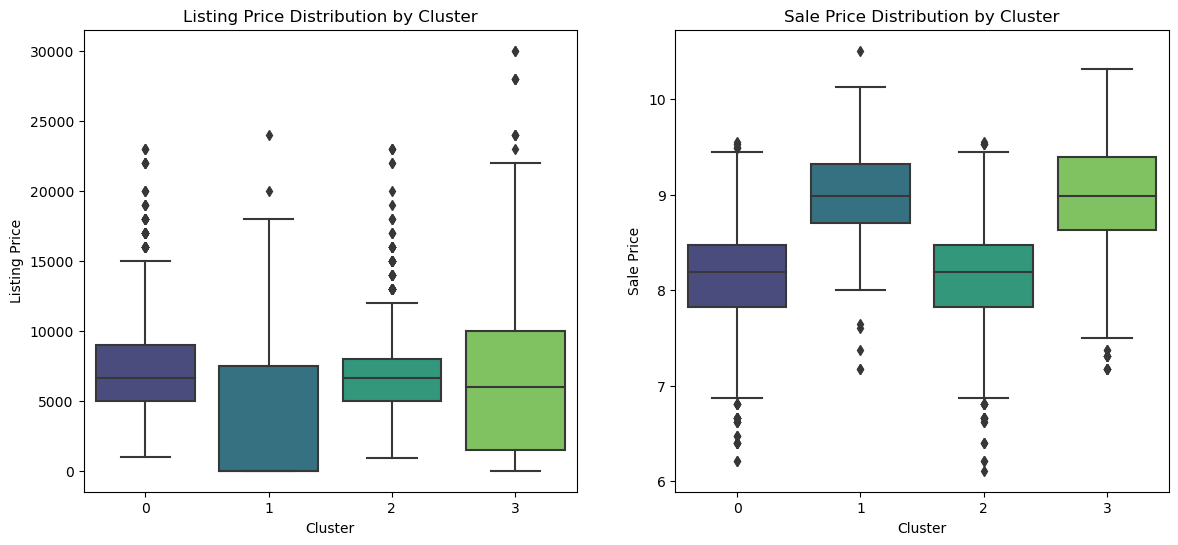

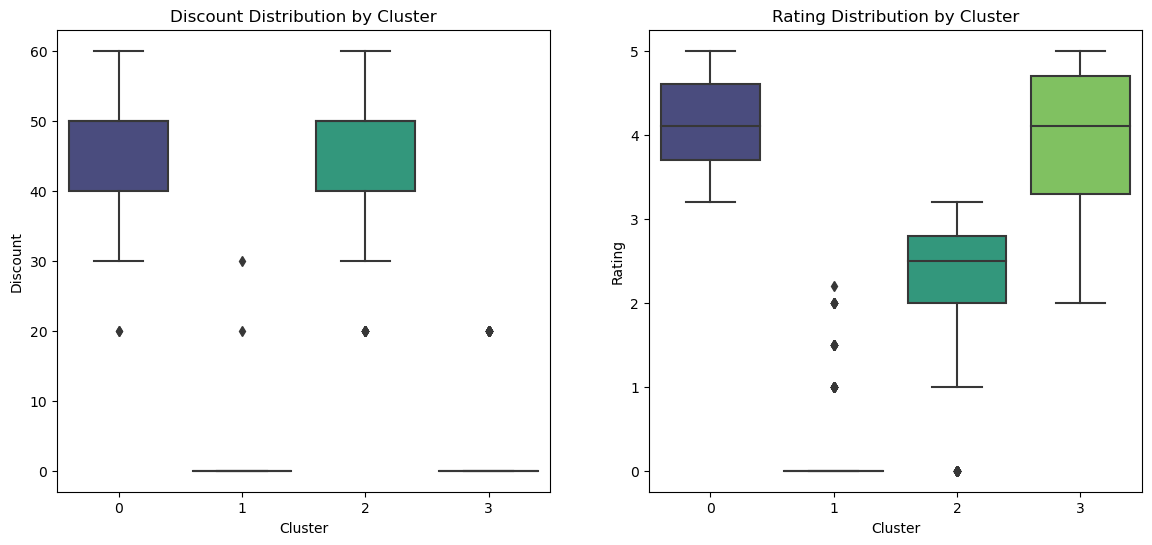

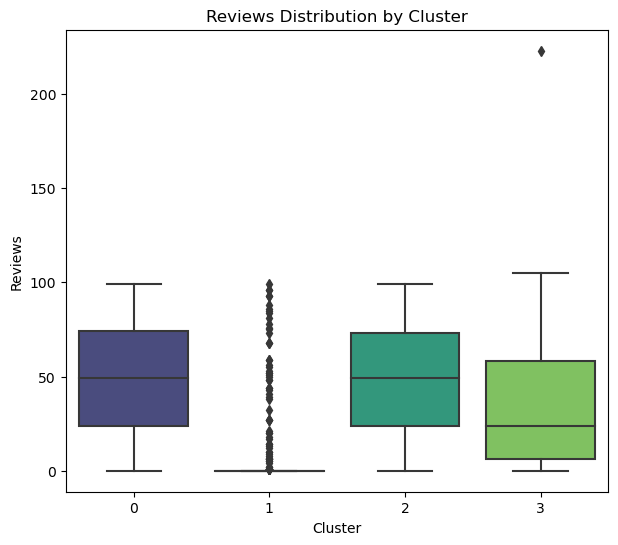

In [260]:
# Inspect clusters' average for each feature
cluster_profiles = df_with_clusters.groupby('Cluster').agg({
    'Listing Price': 'mean',
    'Sale Price': 'mean',
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
})

# Visualize price-related features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Listing Price', data=df_with_clusters, palette='viridis')
plt.title('Listing Price Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Sale Price', data=df_with_clusters, palette='viridis')
plt.title('Sale Price Distribution by Cluster')
plt.show()

# Visualize Discounts and Ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Discount', data=df_with_clusters, palette='viridis')
plt.title('Discount Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Rating', data=df_with_clusters, palette='viridis')
plt.title('Rating Distribution by Cluster')
plt.show()

# Visualize Reviews
plt.figure(figsize=(7, 6))
sns.boxplot(x='Cluster', y='Reviews', data=df_with_clusters, palette='viridis')
plt.title('Reviews Distribution by Cluster')
plt.show()

In [261]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df_with_clusters.groupby('Cluster').agg({
    'Listing Price': ['mean', 'median', 'std', 'count'],
    'Sale Price': ['mean', 'median', 'std', 'count'],
    'Discount': ['mean', 'median', 'std', 'count'],
    'Rating': ['mean', 'median', 'std', 'count'],
    'Reviews': ['mean', 'median', 'std', 'count']
})

descriptive_stats.T.round(2)


Cluster                     0        1        2        3
Listing Price mean    7483.60  3901.99  7314.35  6709.57
              median  6599.00     0.00  6599.00  5999.00
              std     3884.99  5419.09  3600.29  5683.92
              count   1136.00   300.00   795.00  1037.00
Sale Price    mean       8.18     9.01     8.17     8.97
              median     8.19     8.99     8.19     8.99
              std        0.54     0.51     0.52     0.56
              count   1136.00   300.00   795.00  1037.00
Discount      mean      45.09     0.17    45.16     0.64
              median    50.00     0.00    50.00     0.00
              std        6.54     2.08     7.14     3.51
              count   1136.00   300.00   795.00  1037.00
Rating        mean       4.13     0.22     2.21     3.94
              median     4.10     0.00     2.50     4.10
              std        0.54     0.52     0.83     0.83
              count   1136.00   300.00   795.00  1037.00
Reviews       mean      49.00     8.41    49.03    34.10
              median    49.00     0.00    49.00    24.00
              std       29.02    21.65    28.54    31.32
              count   1136.00   300.00   795.00  1037.00

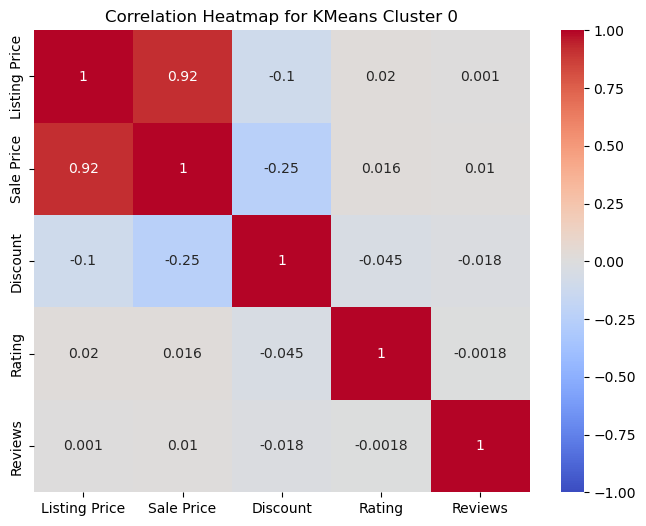

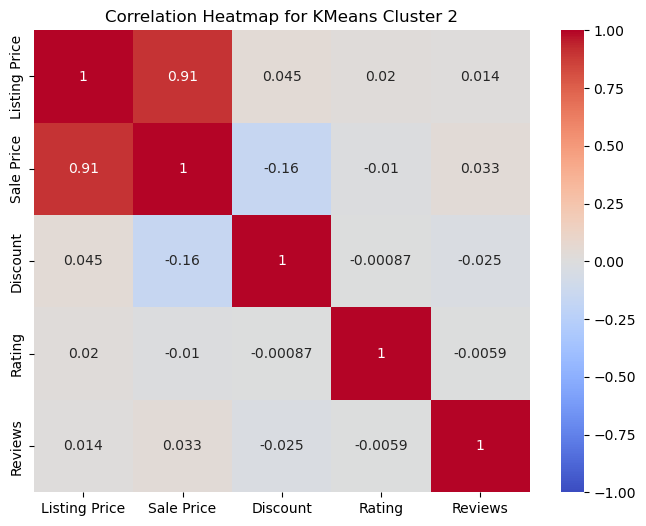

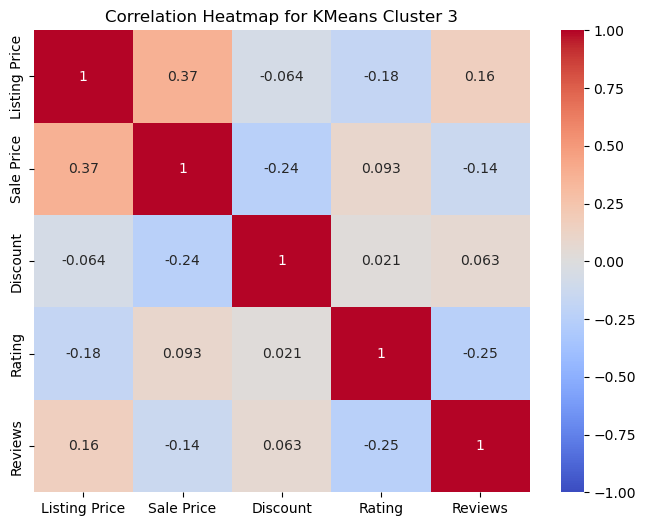

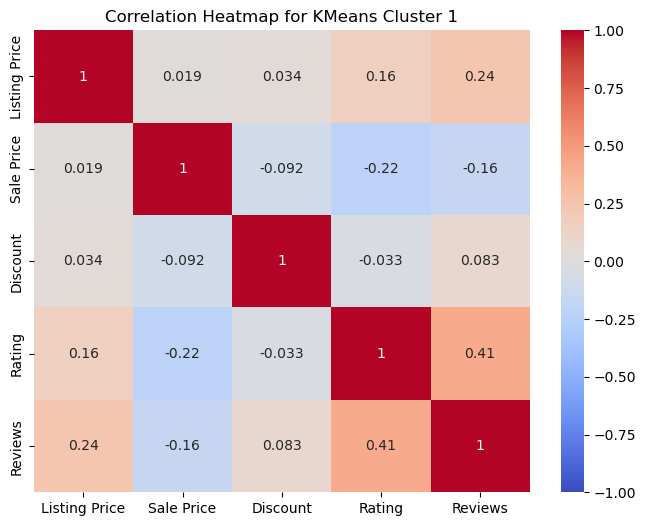

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to consider for correlation analysis
features_for_correlation = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Create a correlation heatmap for each KMeans cluster
for cluster in df_with_clusters['Cluster'].unique():
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster][features_for_correlation]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for KMeans Cluster {cluster}')
    plt.show()

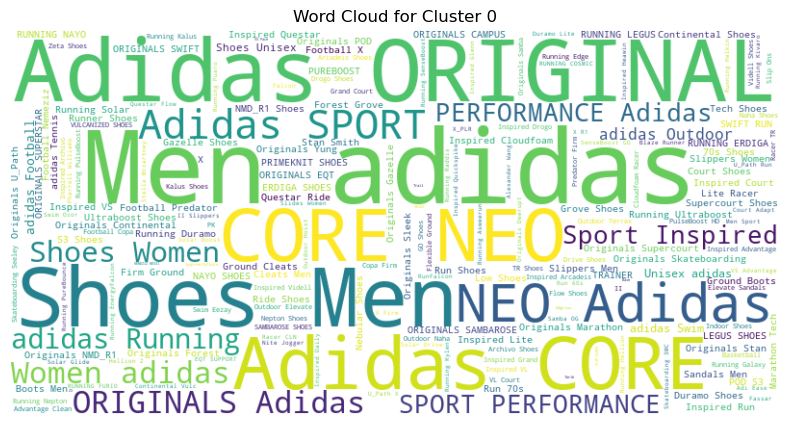

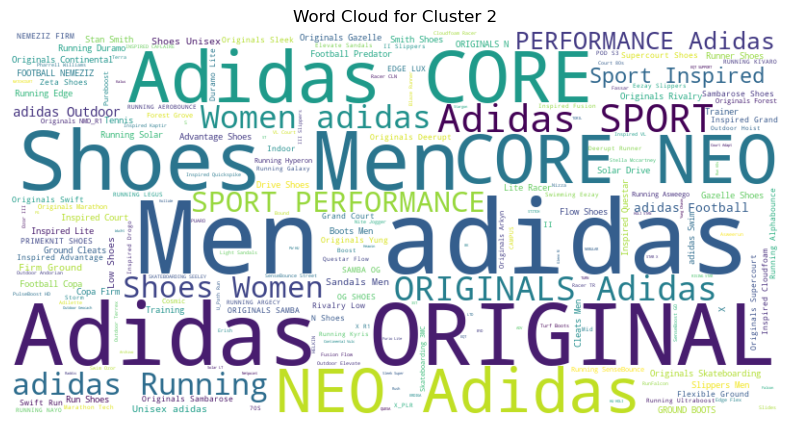

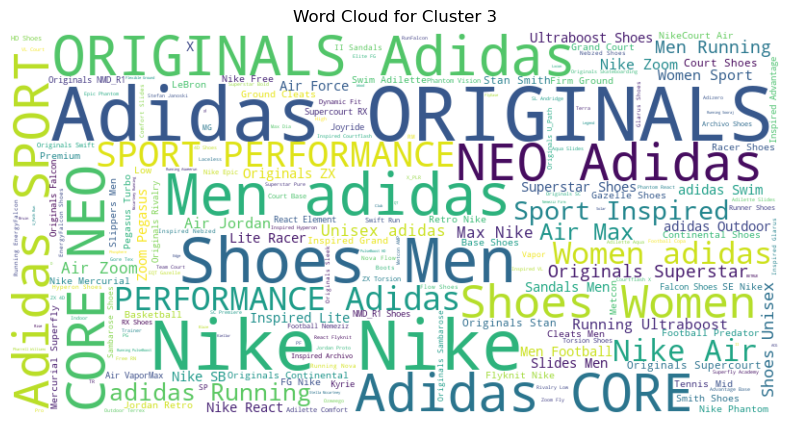

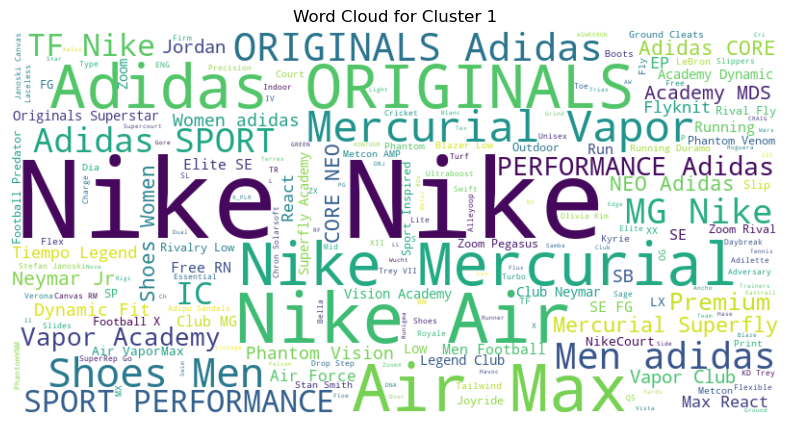

In [263]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each cluster
for cluster in df_with_clusters['Cluster'].unique():
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == cluster]

    # Concatenate Product Names and Brands for the word cloud
    product_text = ' '.join(cluster_data['Product Name'])
    brand_text = ' '.join(cluster_data['Brand'])
    full_text = product_text + ' ' + brand_text

    # Generate WordCloud for the combined text
    generate_word_cloud(full_text, f'Word Cloud for Cluster {cluster}')